# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Перед тем, как мы обсудим подходы к настройки параметров модели, обсудим важные ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Давайте попробуем реализовать этот алгоритм настройки параметров модели.

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Визуализируем данные, используя библиотеку matplotlib. Мы сразу разделили наши данные на обучающую и тестовую выборки (точки обозначены разными цветами).

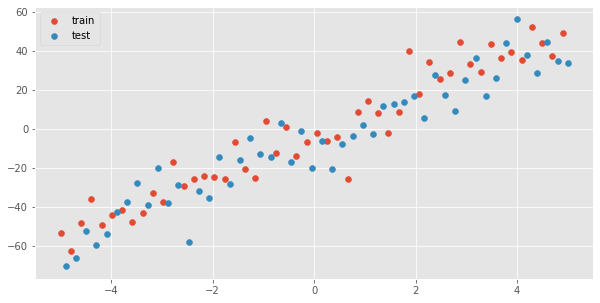

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w = model.coef_
b = model.intercept_

In [ ]:
w, b

(array([10.6274573]), -2.134222525799893)

Визуализируем предсказания.

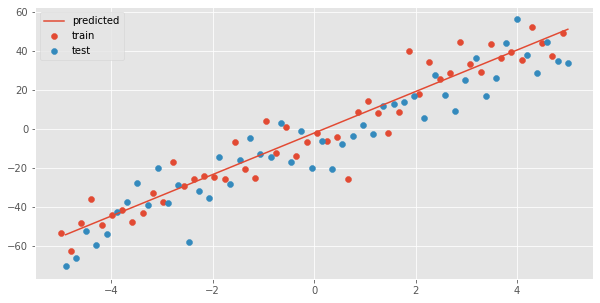

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Задание 3.1

In [ ]:
from numpy import linalg
#Мнк
def MNK(X: np.array, Y):
  Xn = np.concatenate((X, np.ones((X.shape[0],1))), axis=1)
  w = linalg.inv(Xn.transpose().dot(Xn)).dot(Xn.transpose().dot(Y))
  b = w[-1]
  w = w[:1]
  return w, b

#MSE

def MSE(y_test: np.ndarray, y_predict: np.ndarray):
  return np.sum(np.power(y_predict - y_test, 2)) / len(y_test)

#MAE

def MAE(y_test: np.ndarray, y_predict: np.ndarray):
  return np.sum(abs(y_predict - y_test)) / len(y_test)


In [ ]:
ans = MNK(X_train, y_train)
w = ans[0]
b = ans[1]
w, b

(array([10.6274573]), -2.1342225257998932)

In [ ]:
#MSE
#Train
temp01 = MSE(y_train, X_train.dot(w) + b)
print('Train MSE: ', temp01)
#Test
temp02 = MSE(y_test, X_test.dot(w) + b)
print('Test MSE: ', temp02)

#MAE
#Train
temp03 = MAE(y_train, X_train.dot(w) + b)
print('Train MAE: ', temp03)
#Test
temp04 = MAE(y_test, X_test.dot(w) + b)
print('Test MAE: ', temp04)


Train MSE:  78.10200398320065
Test MSE:  120.9312919928688
Train MAE:  6.30521604616257
Test MAE:  8.96822027116897


## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
temp11 = mean_squared_error(y_train, y_train_predicted)
temp12 = mean_squared_error(y_test, y_test_predicted)
print('Train MSE: ', temp11)
print('Test MSE: ', temp12)
#Сравнение MSE
print('Diff in Train MSE:', temp11 - temp01)
print('Diff in Test MSE:', temp12 - temp02)
#e^[-14] -> 0


Train MSE:  78.10200398320066
Test MSE:  120.93129199286878
Diff in Train MSE: 1.4210854715202004e-14
Diff in Test MSE: -1.4210854715202004e-14


In [ ]:
from sklearn.metrics import mean_absolute_error

temp13 = mean_absolute_error(y_train, y_train_predicted)
temp14 = mean_absolute_error(y_test, y_test_predicted)
print('Train MAE: ', temp13)
print('Test MAE: ', temp14)
#Сравнение MAE
print('Diff in Train MSE:', temp13 - temp03)
print('Diff in Test MSE:', temp14 - temp04)
#e^[-16] -> 0

Train MAE:  6.3052160461625695
Test MAE:  8.96822027116897
Diff in Train MSE: -8.881784197001252e-16
Diff in Test MSE: 0.0


Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

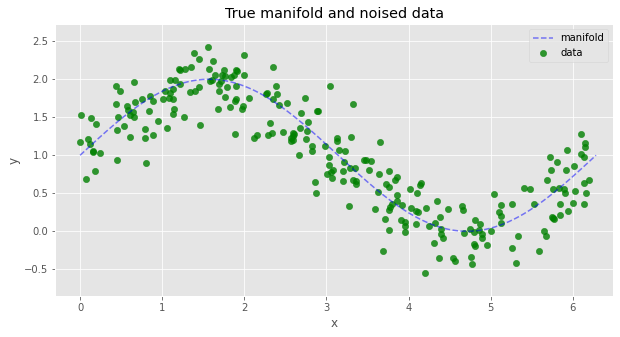

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
model = LinearRegression()

model.fit(data['x_train'].reshape(-1, 1), data['y_train']) # обучение модели

w = model.coef_
b = model.intercept_

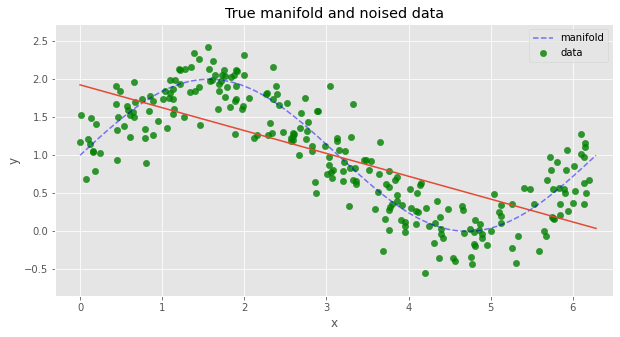

In [ ]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w) + b, label='predicted')
plt.show()

In [ ]:
data['y_train'].shape

(250,)

In [ ]:
y_train_predicted = model.predict(data['x_train'].reshape(-1, 1))
y_train_predicted.shape

(250,)

In [ ]:
print('Train MSE: ', mean_squared_error(data['y_train'], y_train_predicted))

Train MSE:  0.24885739780269478


Кажется, что-то пошло не так. Или всё нормально?

Из графика видно что prediction(красная линия) даже не близка к manifold, что означает непригодность полинома данной степени.
(Проще говоря красная линия должна стремиться к синей а не случайно ее иногда пересекать, точность предсказания никакая >> MSE такой.)

## Задание 3.2

In [ ]:
#MNK
ans2 = MNK(data['x_train'].reshape(-1, 1), data['y_train'].reshape(-1, 1))
w = ans2[0]
b = ans2[1]
w, b

(array([[-0.3005144]]), array([1.92573678]))

In [ ]:
#MSE
mse32 = MSE(data['y_train'].reshape(-1 ,1), data['x_train'].reshape(-1, 1).dot(w) + b)
print('Train MSE: ', mse32)
#MAE
mae32 = MAE(data['y_train'].reshape(-1 ,1), data['x_train'].reshape(-1, 1).dot(w) + b)
print('Train MAE: ', mae32)

Train MSE:  0.24885739780269472
Train MAE:  0.40996025154458665


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Функция из пункта выше + строчка считающая prediction
def plot(x_func, y_predict, power):
  plt.figure(figsize=(10, 5))
  margin = 0.3
  plt.plot(x_func, y_predict, label='prediction')
  plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
  plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
  plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
  plt.legend(loc='upper right')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

#Функция, которая для каждой степени посчитает значения x,y для добавленной строчки в plot_fuction
def count_vals(X_train, y_train, X_test, power):
  polynomial = PolynomialFeatures(degree=power)
  Xn = polynomial.fit_transform(X_train.reshape(-1, 1))
  model.fit(Xn, y_train)
  Xn_test = polynomial.fit_transform(X_test.reshape(-1, 1))
  y_predict_test = model.predict(Xn_test)
  y_predict_train = model.predict(Xn)
  return y_predict_train, y_predict_test

#Функция с for, которая запустит 2 верхние функции и отобразит результат нужное число раз
def answalt(X_train, y_train, X_test, y_test, lastpower):
  errors = pd.DataFrame(columns=['Train', 'Test'])
  for i in range(1, lastpower + 1):
    y_predict_train, y_predict_test = count_vals(X_train, y_train, X_test, i)
    errors.loc[i - 1] = {'Train': MSE(y_train, y_predict_train), 'Test': MSE(y_test, y_predict_test)}
    plot(X_train,  y_predict_train, i)

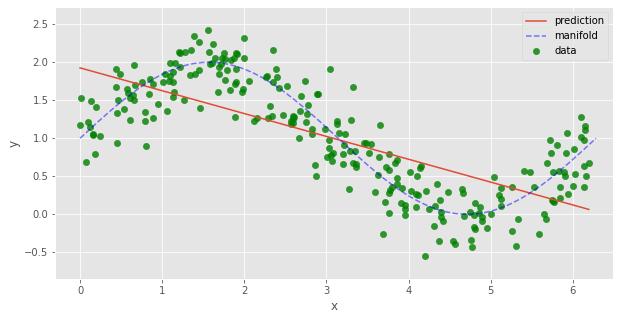

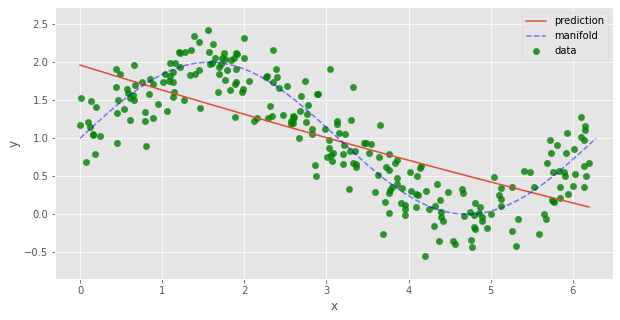

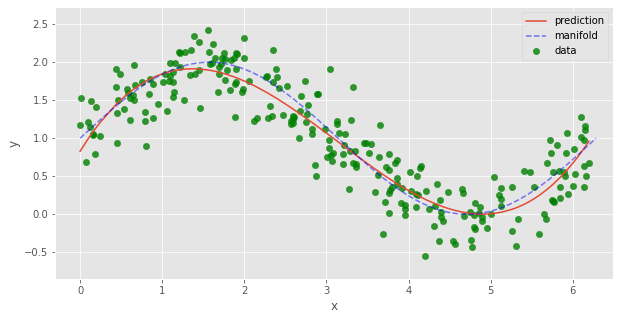

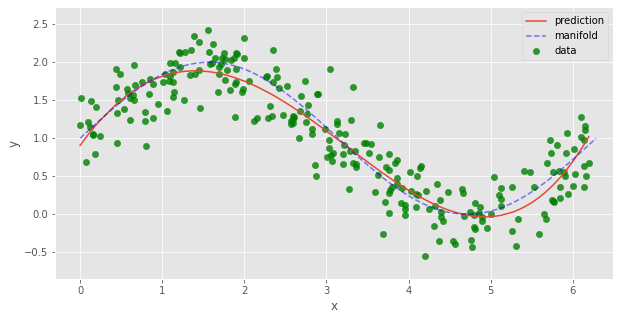

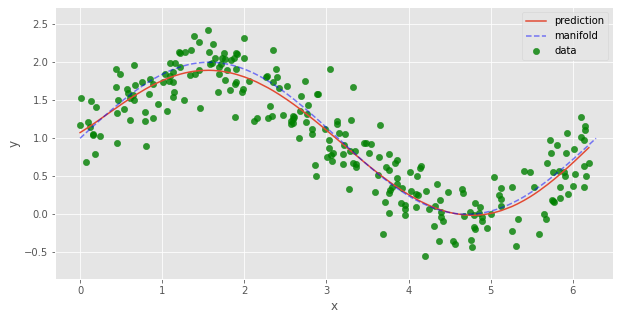

In [ ]:
from sklearn.model_selection import train_test_split
powers = [1, 2, 3, 4, 5]
wave_set = generate_wave_set()
answalt(data['x_train'], data['y_train'], wave_set['x_train'], wave_set['y_train'], 5)


Больше других подходит полином 3 степени, потому что сильных отличий от полиномов старших степеней нет,а чем меньше степень тем меньше вычислений >> меньше нагрузки. Лучшее соотношение точности к нагрузке.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

CRIM: Уровень преступности на душу населения по городам

ZN: Доля земель под жилую застройку, зонированных под участки площадью более 25 000 кв. Футов

INDUS: доля акров, не связанных с розничной торговлей, на город

CHAS: фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае)

NOX: концентрация оксида азота (частей на 10 миллионов)

RM: Среднее количество комнат в доме

AGE: Доля жилых домов, построенных до 1940 года.

DIS: взвешенные расстояния до пяти бостонских центров занятости

RAD: Индекс доступности радиальных магистралей

TAX: Полная ставка налога на имущество за 10 000 долларов США.

PTRATIO: Соотношение учеников и учителей по городам

B: 1000 (Bk - 0,63) ², где Bk - доля [лиц афроамериканского происхождения] по городам.

LSTAT: процент населения с более низким статусом

MEDV: Средняя стоимость домов, занимаемых владельцами, оценивается в 1000 долларов.

Визуализируем распределения признаков в датасете

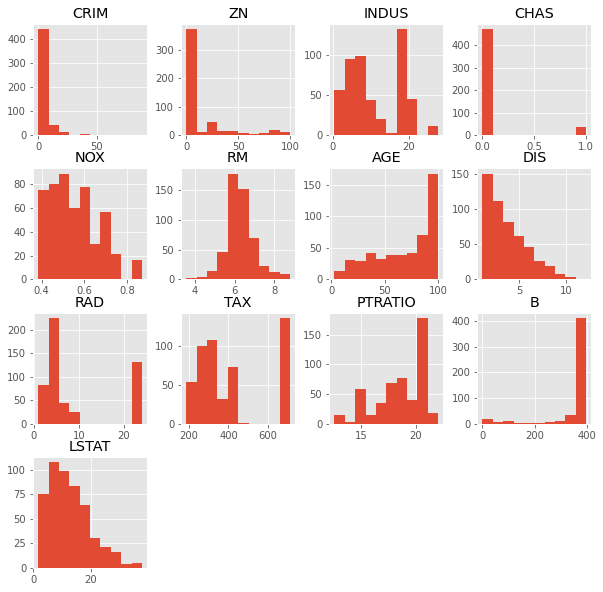

In [ ]:
_ = X.hist(X.columns, figsize=(10, 10))

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
y_train.shape, y_test.shape

((354,), (152,))

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  20.74216282109681
Test MSE:  25.862492618505787
Train MAE:  3.205357008912925
Test MAE:  3.569903515449256


Визуализируем получившиеся веса. Какие выводы мы можем сделать из этой визуализации?



+ Без нормирования результат не отражает действительную ситуацию. Преобладающий на графике показатель(концентрация оксида азота) не является ключевым(в ценообразовании), чего по полученным данным сказать невозможно. (Визуализация вводит в заблуждение.)

<BarContainer object of 13 artists>

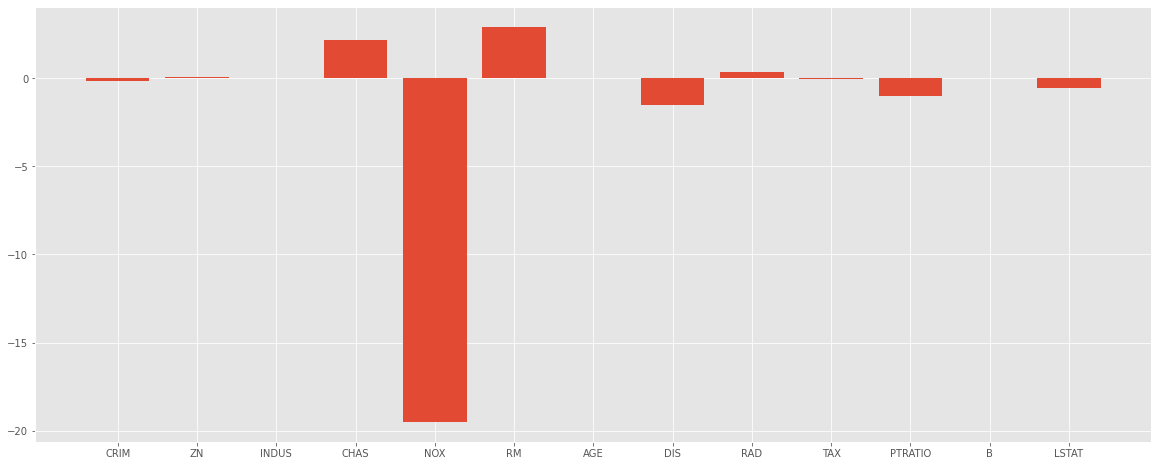

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

<BarContainer object of 13 artists>

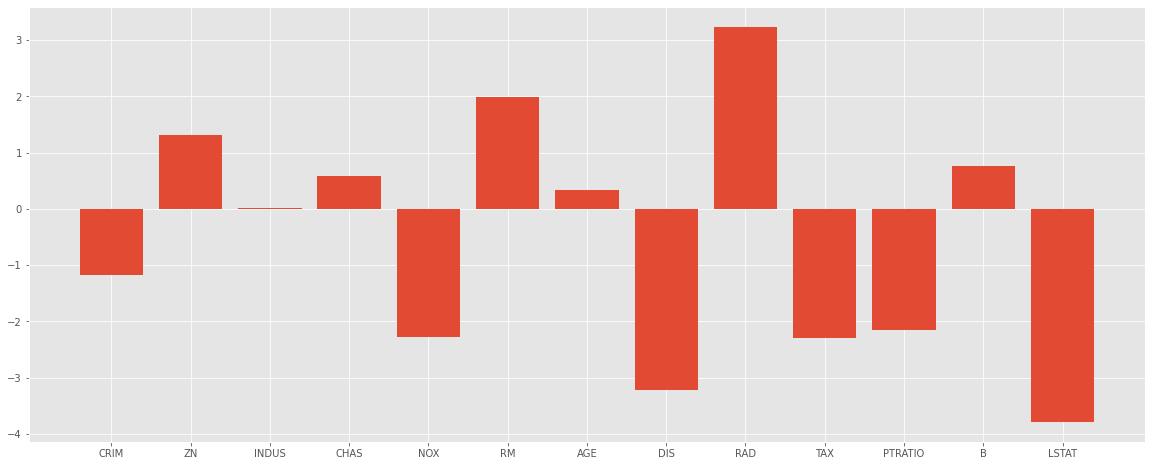

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Какие выводы мы можем сделать из этой визуализации?

  + После нормализации данные будут отражать реальную ситуацию дел(с значительно большей вероятностью, чем без нее). 
  + Очевидно, что определяющими параметрами повышающими стоимость жилья являются площадь и расположение(не помню красивое название про то как легко из застройки выехать\приехать), что подтверждается визуализацией. 
  + НЕблагополучность района(совокупность CRIM & LSTAT) и удаленность от экономических центров являются определяющими факторами снижения цены на жилье.
  + Налоги и инфраструктура также сильно влияют на цену(хоть и в меньшей степени, чем пред пункт).
  + Оставшиеся признаки непоказательны.
  + Непонятно, что тут делает концентрация чего-то в воздухе. Зачем вообще этот признак. В моем понимании, концентрация веществ в воздухе скорее следствие неких других признаков(INDUS напиример).

## Задание 3.4

In [ ]:
#Full
X_full_train = scaler.fit_transform(X_train)
X_full_test = scaler.transform(X_test)
model.fit(X_full_train, y_train)
y_predict_test = model.predict(X_full_test )
y_predict_train = model.predict(X_full_train)
full = MSE(y_test, y_predict_test), MAE(y_test, y_predict_test), MSE(y_train, y_predict_train), MAE(y_train, y_predict_train)

In [ ]:
#Cut
X_cut = X[['LSTAT', 'RAD', 'DIS', 'TAX', 'NOX', 'PTRATIO', 'RM']]
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, train_size=0.7)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)
cut = MSE(y_test, y_predict_test), MAE(y_test, y_predict_test), MSE(y_train, y_predict_train), MAE(y_train, y_predict_train)

In [ ]:
print(full)
print(cut)

(24.480333498926047, 3.8588081741493423, 24.73611291698836, 3.5075366720300583)
(27.10569841013999, 3.5441409904150194, 22.900400982690385, 3.5074493766278194)


+ Если отсекать малозначимые признаки, то уменьшается количество ошибок при переходе от test выборки к train. Хотя на самой тестовой выборке наоборот больше ошибок получается.